# Ground truth tests for analysis of generation data 

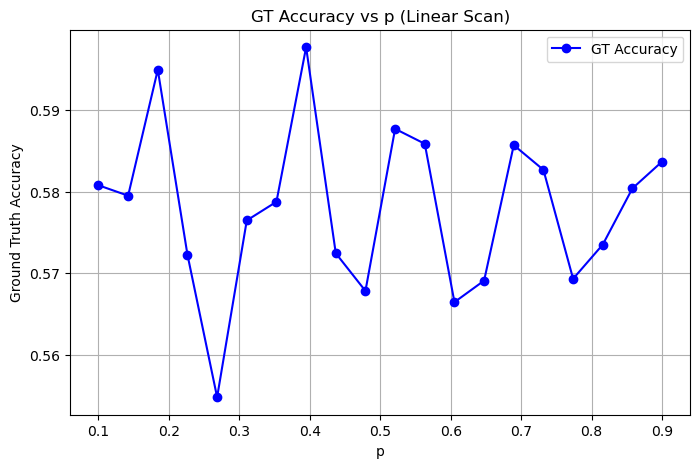

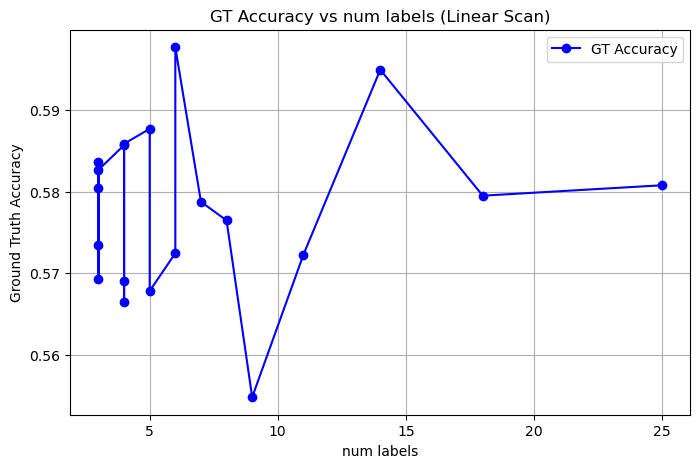

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from visualization import *

# defining a constant for p*num_label to keep it constant
p_base = 0.5
num_label_base = 5
constant_product = p_base * num_label_base  # reference value for p*num_label

# generate the values of p and num_label to test with the linear scan
p_values = list(np.linspace(0.1, 0.9, 20))  # 5 values of p
num_label_values = [int(round(constant_product / p)) for p in p_values]  
# start the parameter scan
results_linear = parameter_scan_ground_truth(n=100, m=200, p=p_values, d=10, s=1.0, device="cpu",
                                             num_label=num_label_values, linear=True)

# Get the results of the parameter scan
p_tested = [res['params']['p'] for res in results_linear]
gt_accuracy = [res['results']['gt_accuracy'] for res in results_linear]

# Plot GT Accuracy vs p
plt.figure(figsize=(8,5))
plt.plot(p_tested, gt_accuracy, marker='o', linestyle='-', color='b', label="GT Accuracy")
plt.xlabel("p")
plt.ylabel("Ground Truth Accuracy")
plt.title("GT Accuracy vs p (Linear Scan)")
plt.grid(True)
plt.legend()
plt.savefig('Results/gt_accuracy_vs_p_linear_scan.png')
plt.show()
# plot GT Accuracy vs num_label
plt.figure(figsize=(8,5))
plt.plot(num_label_values, gt_accuracy, marker='o', linestyle='-', color='b', label="GT Accuracy")
plt.xlabel("num labels")
plt.ylabel("Ground Truth Accuracy")
plt.title("GT Accuracy vs num labels (Linear Scan)")
plt.grid(True)
plt.legend()
plt.savefig('Results/gt_accuracy_vs_numlabel_linear_scan.png')
plt.show()


Saved heatmap as Results/heatmap_gt_accuracy_numlabel_p.png.png


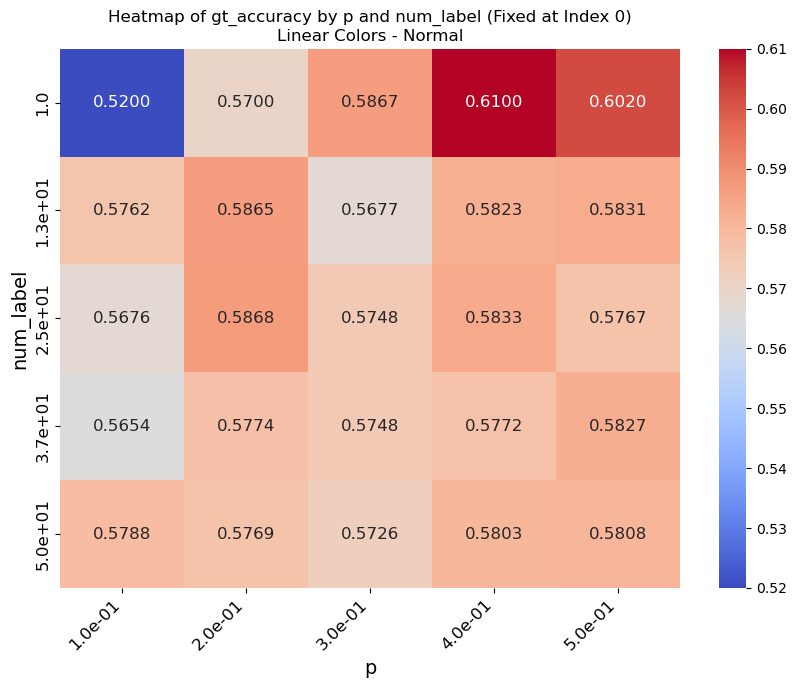

In [ ]:
from helpers import parameter_scan_ground_truth
import numpy as np


# define values for p and num_label
p_values = list(np.linspace(0.1, 0.5, 5))  # 5 valeurs entre 0.1 et 0.5
num_label_values = np.linspace(1, 50, 5, dtype=int)  # 5 values between 1 et 50

# launch parameter scan with linear=False
results_full = parameter_scan_ground_truth(n=100, m=200, p=p_values, d=10, s=1.0, device="cpu",
                                           num_label=num_label_values, linear=False)

from visualization import plot_all_heatmaps

# plot heatmap for gt_accuracy vs p and num_label

plot_all_heatmaps(results_full, "p", "num_label", "gt_accuracy", save_path="Results/heatmap_gt_accuracy_numlabel_p")


